# Mall Customer Segmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head(3)

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 

In [ ]:
df = df.drop(["CustomerID", "Gender"], axis=1)
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


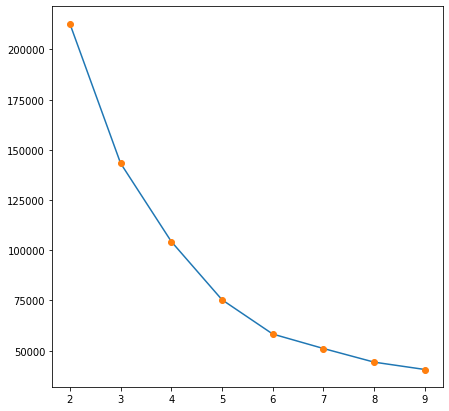

In [ ]:
scores = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  scores.append( -kmeans.score(df) )
  
plt.figure(figsize=(7, 7))
plt.plot([k for k in range(2,10)], scores)
plt.plot([k for k in range(2,10)], scores, "o")

plt.show()

When we look at the graph showing the errors that occur with the use of different k values, we see that the elbow method cannot reach a clear result.

However, using the intuition in the elbow method, roughly the points where the graph makes the sharpest rotation change can be seen as when k equals 5 and 6, and therefore one of these two values can be chosen as the k value. I will continue with k=5.

- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

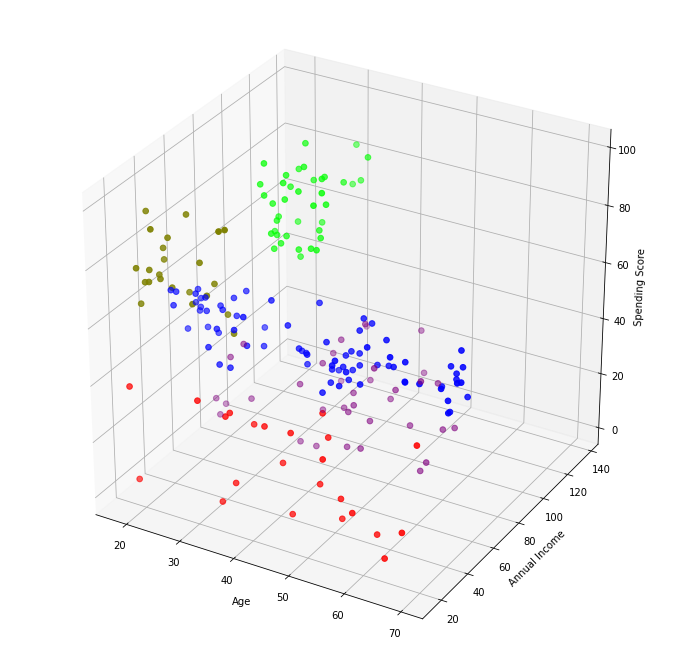

In [ ]:
y_pred = KMeans(n_clusters=5).fit_predict(df)

fig_3d = plt.figure(figsize=(12,12))
ax = fig_3d.add_subplot(projection="3d")
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=y_pred, cmap="brg", s=32)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

The model does a good job of separating some obvious clusters (green one). However, it cannot separate clearly since most of the data is more "messy" and does not form clusters. But the cause of this problem is not the value of k, of course.